# NRTK Perturber Functionality

This is a simple notebook demonstrating the use of the `nrtk` perturbers.

## Table Of Contents

* [Environment Setup](#environment-setup)
* [Initial Image](#init-image)
* [`scikit-image` Perturbers](#scikit-image-perturbers)
    * [Salt Perturber](#salt-perturber)
    * [Pepper Perturber](#pepper-perturber)
    * [Salt and Pepper Perturber](#salt-and-pepper-perturber)
    * [Gaussian Perturber](#gaussian-perturber)
    * [Speckle Perturber](#speckle-perturber)

## Environment Setup <a name="environment-setup"></a>

In [1]:
import sys

!{sys.executable} -m pip install -qU pip
print("Installing matplotlib...")
!{sys.executable} -m pip install -q matplotlib
print("Done!")

Installing matplotlib...
Done!


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "jpeg"  # Use JPEG format for inline visualizations
from matplotlib import pyplot as plt  # type: ignore
from matplotlib.axes import Axes  # type: ignore

import numpy as np
import os
import urllib.request
from PIL import Image
from typing import TYPE_CHECKING, Any, Dict

from nrtk.impls.perturb_image.skimage.random_noise import (
    SaltPerturber,
    PepperPerturber,
    SaltAndPepperPerturber,
    GaussianPerturber,
    SpecklePerturber
)

## Initial Image <a name="init-image"></a>

We'll carry out perturbations on a singular image from Visdrone.

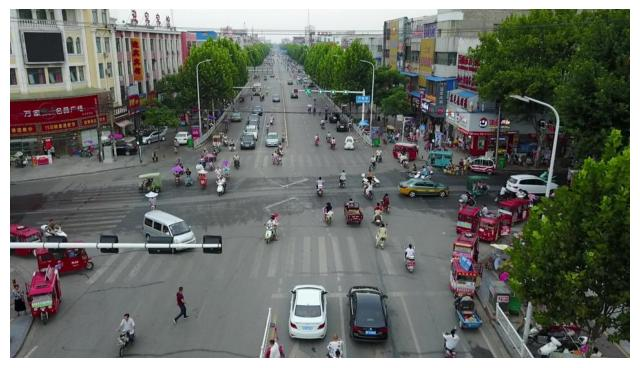

In [3]:
data_dir = './data'
os.makedirs(data_dir, exist_ok=True)

url = 'https://data.kitware.com/api/v1/item/623880f14acac99f429fe3ca/download'

img_path = os.path.join(data_dir, 'visdrone_img.jpg')
if not os.path.isfile(img_path):
    _ = urllib.request.urlretrieve(url, img_path)
    
img = np.asarray(Image.open(img_path))

plt.figure(figsize=(8,8))
plt.axis('off')
_ = plt.imshow(img)

We'll also define a couple of helper functions for displaying our perturbations.

In [4]:
def display(img: np.ndarray, descriptor: str=""):  
    fig, axs = plt.subplots(figsize=(8, 8))
    if TYPE_CHECKING:
        assert(isinstance(axs, Axes))
    axs.set_title(descriptor)
    axs.imshow(img)
    axs.axis("off")

In [5]:
def config_to_str(config: Dict[str, Any]) -> str:
    out = ", ".join([f"{k}={v}" for k, v in config.items()])
    return f"({out})"     

## `scikit-image` Perturbers <a name="scikit-image-perturbers"></a>

First, we'll look at our implementations of `scikit-image` perturbers. For all of these perturbers, we can specify a psuedo-random number generator (RNG) or seed if results need to be reproducible.

### Salt Perturber <a name="salt-perturber"></a>

The `SaltPerturber` replaces random pixels with 1.

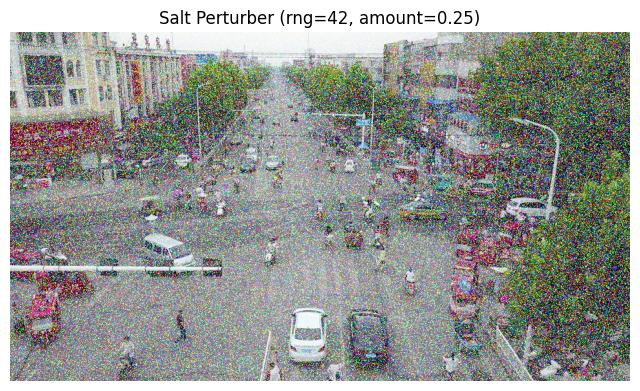

In [6]:
seed = 42
amount = 0.25

salt_perturber = SaltPerturber(
    rng=seed,
    amount=amount
)
salt_out = salt_perturber(img)
display(salt_out, f"Salt Perturber {config_to_str(salt_perturber.get_config())}")

Since we specified a seed, we can confirm that our results are reproducible:

In [7]:
salt_perturber2 = SaltPerturber(
    rng=seed,
    amount=amount
)
salt_out2 = salt_perturber2(img)
print(np.array_equal(salt_out, salt_out2))
assert np.array_equal(salt_out, salt_out2)

True


### Pepper Perturber <a name="pepper-perturber"></a>

The `PepperPerturber` replaces random pixels with 0 (for unsigned images) or -1 (for signed images).

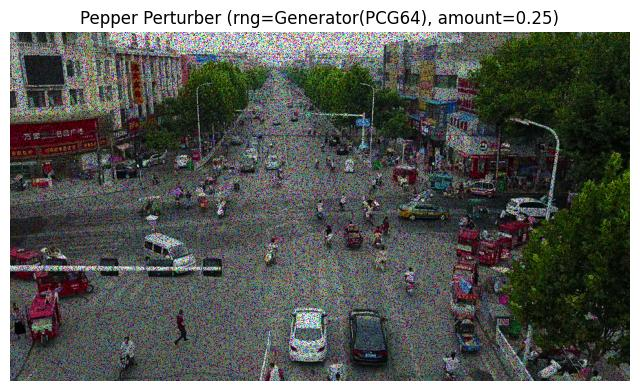

In [8]:
seed = 42
amount = 0.25

pepper_perturber = PepperPerturber(
    rng=np.random.default_rng(seed),
    amount=amount
)
pepper_out = pepper_perturber(img)
display(pepper_out, f"Pepper Perturber {config_to_str(pepper_perturber.get_config())}")

Again, we can confirm that our results are reproducible, but this time we're directly using a generator:

In [9]:
pepper_perturber2 = PepperPerturber(
    rng=np.random.default_rng(seed),
    amount=amount
)
pepper_out2 = pepper_perturber2(img)
print(np.array_equal(pepper_out, pepper_out2))
assert np.array_equal(pepper_out, pepper_out2)

True


### Salt and Pepper Perturber <a name="salt-and-pepper-perturber"></a>

The `SaltAndPepperPerturber` replaces random pixels with either salt or pepper noise. Just as before, reproducibility is possible with the `rng` parameter, but we won't continue to demonstrate that.

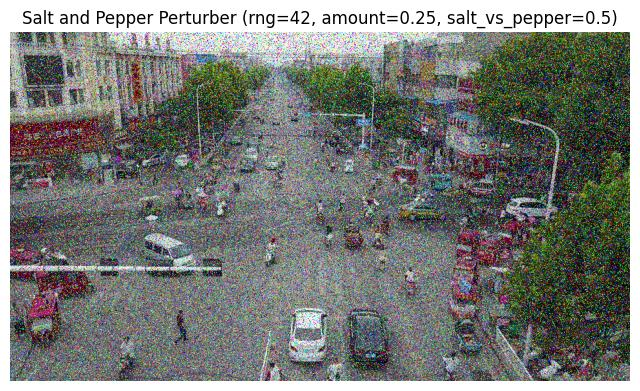

In [10]:
seed = 42
amount = 0.25
salt_vs_pepper = 0.5

sp_perturber = SaltAndPepperPerturber(
    rng=seed,
    amount=amount,
    salt_vs_pepper=salt_vs_pepper
)
sp_out = sp_perturber(img)
display(sp_out, f"Salt and Pepper Perturber {config_to_str(sp_perturber.get_config())}")

### Gaussian Perturber <a name="gaussian-perturber"></a>

The `GaussianPerturber` adds Gaussian-distributed noise to the given image.

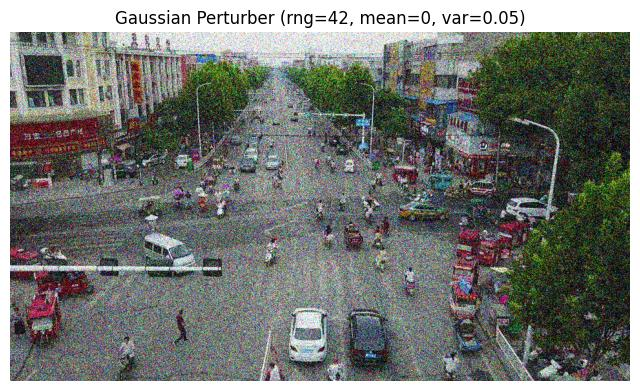

In [11]:
seed = 42
mean = 0
var = 0.05

gaussian_perturber = GaussianPerturber(
    rng=seed,
    mean=mean,
    var=var
)
gaussian_out = gaussian_perturber(img)
display(gaussian_out, f"Gaussian Perturber {config_to_str(gaussian_perturber.get_config())}")

### Speckle Perturber <a name="speckle-perturber"></a>

The `SpecklePerturber` adds multiplicative, Gaussian-distributed noise to the given image.

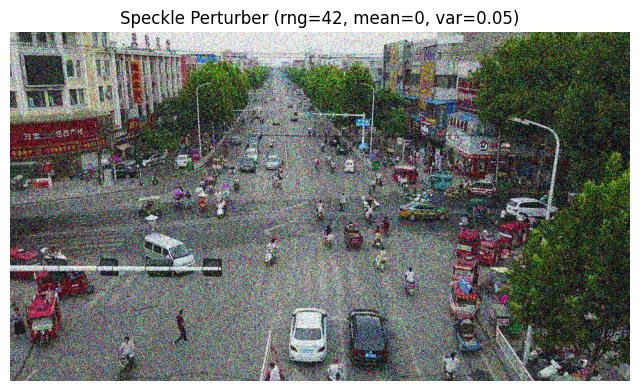

In [12]:
seed = 42
mean = 0
var = 0.05

speckle_perturber = SpecklePerturber(
    rng=seed,
    mean=mean,
    var=var
)
speckle_out = speckle_perturber(img)
display(gaussian_out, f"Speckle Perturber {config_to_str(speckle_perturber.get_config())}")